# PCA

## Part 1: PCA:

Problem Statement: The ‘Hair Salon.csv’View in a new window dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do a Principal Component Analysis for this case study according to the instructions given in the rubric. Kindly refer to the PCA_Data_Dictionary.jpgView in a new window file for the Data Dictionary of the Dataset.  
Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.

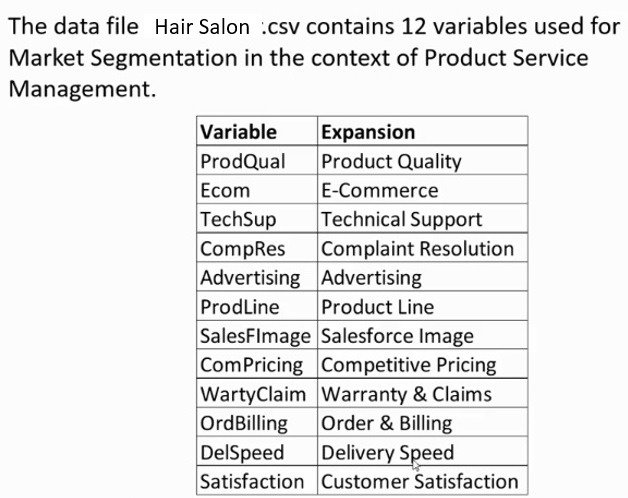

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
%matplotlib inline
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 40.1 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=fc1441b1933233188c1a1de5e395e7f489a49ab5feb50a1981143b655de9e073
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [29]:
# Get the Data
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Data/Factor-Hair-Revised.csv"
df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 PCA: Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.


### Basic Data Exploration

In [4]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [30]:
df = df.drop('ID', axis=1)

In [31]:
df1 = df
df2 = df
df3 = df
df4 = df
df5 = df

In [7]:
# Shape of the data
df.shape

(100, 12)

In [8]:
#Check info of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProdQual      100 non-null    float64
 1   Ecom          100 non-null    float64
 2   TechSup       100 non-null    float64
 3   CompRes       100 non-null    float64
 4   Advertising   100 non-null    float64
 5   ProdLine      100 non-null    float64
 6   SalesFImage   100 non-null    float64
 7   ComPricing    100 non-null    float64
 8   WartyClaim    100 non-null    float64
 9   OrdBilling    100 non-null    float64
 10  DelSpeed      100 non-null    float64
 11  Satisfaction  100 non-null    float64
dtypes: float64(12)
memory usage: 9.5 KB


In [10]:
#Summary of the Dataset
df.describe(include='all').T.round(2)

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.81,1.40,5.0,6.57,8.00,9.10,10.0
Ecom,100.0,3.67,0.70,2.2,3.28,3.60,3.92,5.7
TechSup,100.0,5.36,1.53,1.3,4.25,5.40,6.62,8.5
CompRes,100.0,5.44,1.21,2.6,4.60,5.45,6.32,7.8
Advertising,100.0,4.01,1.13,1.9,3.18,4.00,4.80,6.5
ProdLine,100.0,5.80,1.32,2.3,4.70,5.75,6.80,8.4
SalesFImage,100.0,5.12,1.07,2.9,4.50,4.90,5.80,8.2
ComPricing,100.0,6.97,1.55,3.7,5.88,7.10,8.40,9.9
WartyClaim,100.0,6.04,0.82,4.1,5.40,6.10,6.60,8.1
OrdBilling,100.0,4.28,0.93,2.0,3.70,4.40,4.80,6.7


In [12]:
df.dtypes.value_counts()

float64    12
dtype: int64

In [9]:
# Check for missing values in the Dataset
df.isnull().sum()

ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [13]:
df.duplicated().sum()

0

### Univariate Data Analysis

In [15]:
#To find the skeweness of every attrib
skewness = pd.DataFrame(df.skew().round(2).sort_values()).reset_index()
skewness = skewness.rename(columns = {'index':'Attributes',0:'skewness'})
skewness

,Attributes,skewness
0,DelSpeed,-0.46
1,OrdBilling,-0.33
2,ProdQual,-0.24
3,ComPricing,-0.24
4,TechSup,-0.20
5,CompRes,-0.14
6,ProdLine,-0.09
7,WartyClaim,0.01
8,Advertising,0.04
9,Satisfaction,0.08


In [14]:
# Find kurtosis of all column
pd.DataFrame(df.kurtosis(),columns=['kurtosis']).round(2).rename_axis(index='Feature')

,kurtosis
Feature,
ProdQual,-1.13
Ecom,0.74
TechSup,-0.55
CompRes,-0.59
Advertising,-0.89
ProdLine,-0.52
SalesFImage,0.41
ComPricing,-0.90
WartyClaim,-0.44


ValueError: ignored

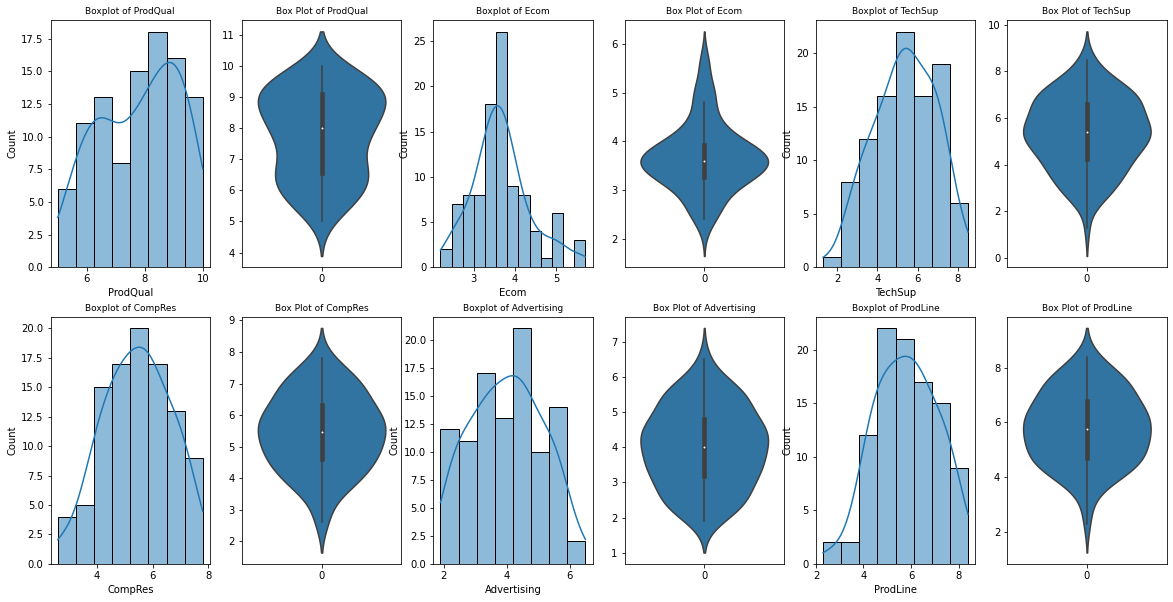

In [16]:
plt.figure(figsize=(20,10))
j=1
for i in df.columns:
    plt.subplot(2,6,j)
    sns.histplot(df[i],kde=True);
    plt.title('Boxplot of '+i,fontsize=9)
    k=j+1
    
    plt.subplot(2,6,k)
    sns.violinplot(df[i]);
    plt.title('Box Plot of '+i,fontsize=9)
    j=k+1

plt.tight_layout();


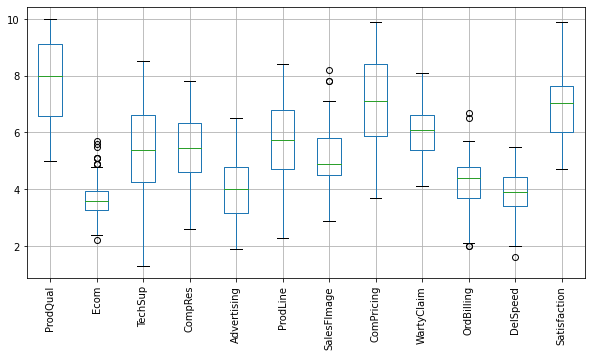

<Figure size 432x288 with 0 Axes>

In [17]:
#Boxplot Representation
df.boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

### Bivariate Analysis

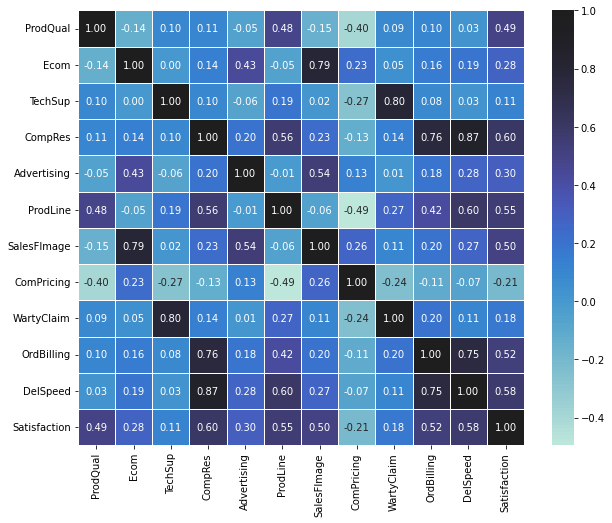

In [ ]:
# Heatmap of correlation
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.2f', center = 1 ) 
plt.show()

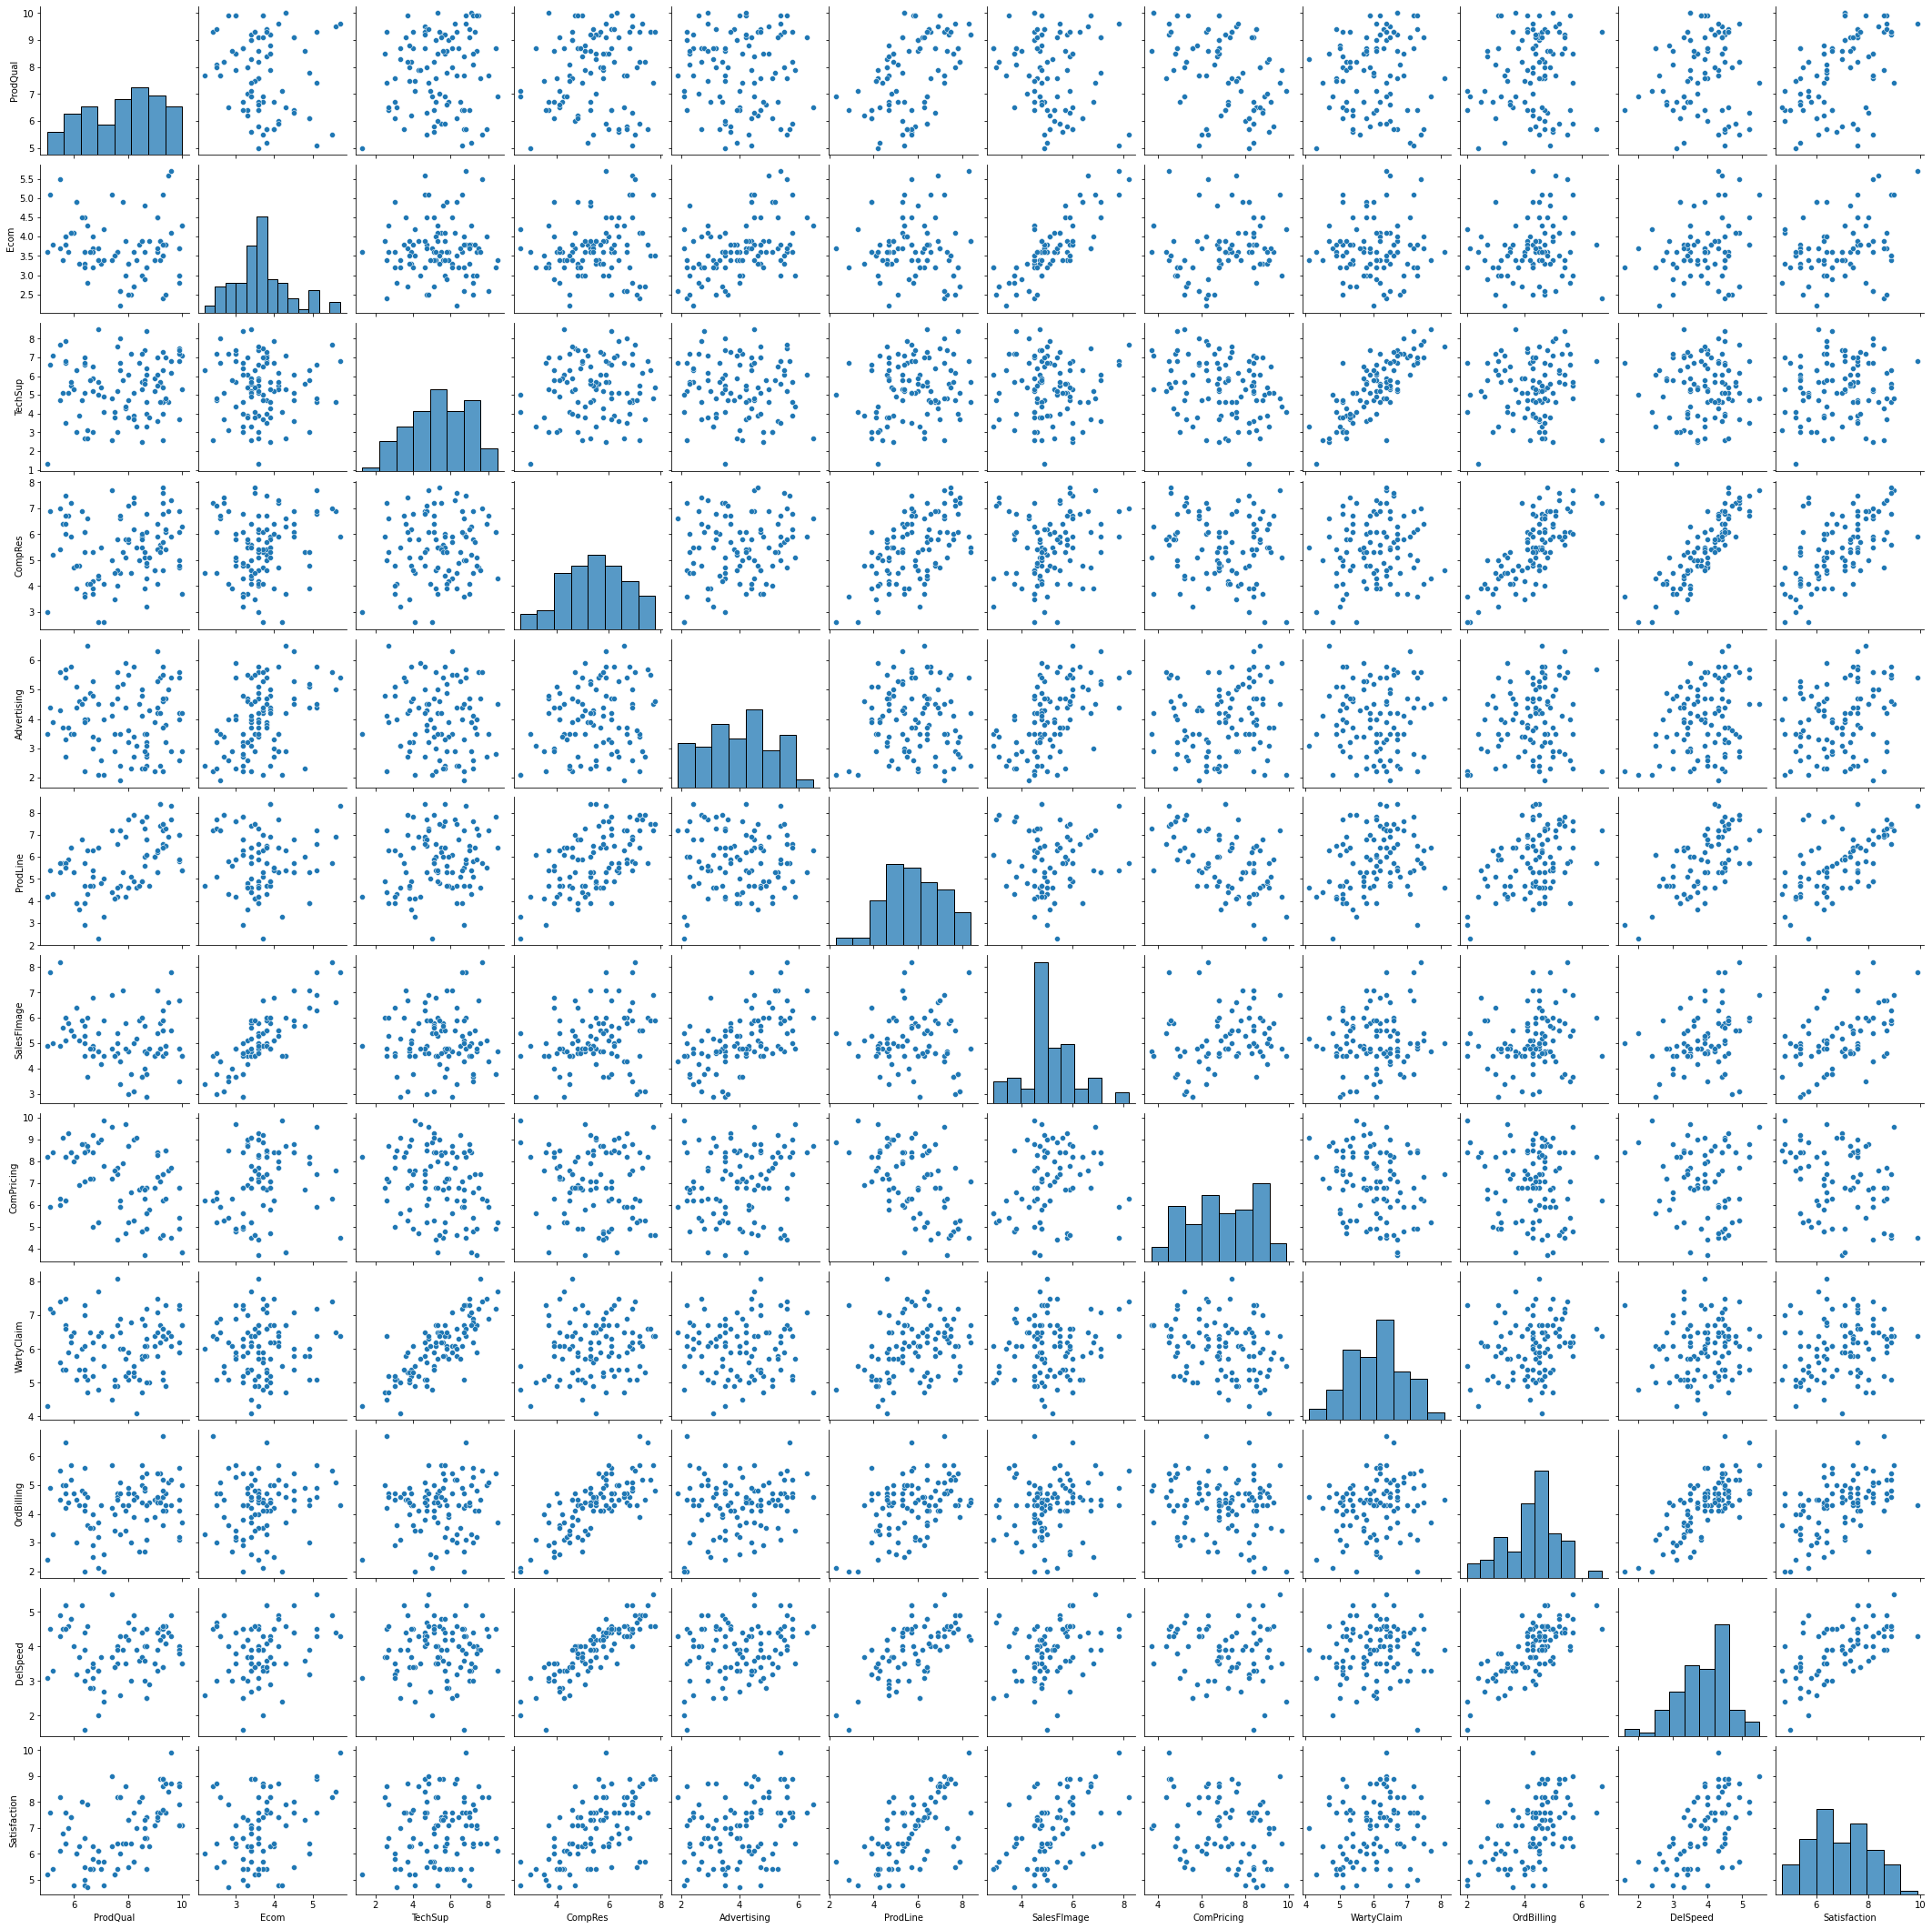

In [ ]:
sns.pairplot(df)

<Axes: xlabel='DelSpeed', ylabel='Satisfaction'>

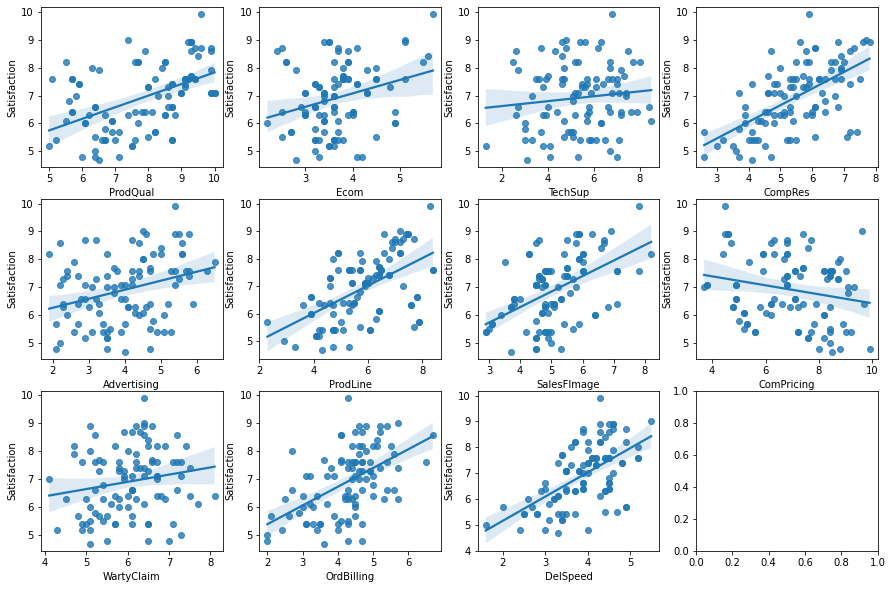

In [ ]:
# Target variable against independent variable
fig, axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(15, 10)

sns.regplot(x=df_pca['ProdQual'], y=df_pca['Satisfaction'], ax=axes[0][0])
sns.regplot(x=df_pca['Ecom'], y=df_pca['Satisfaction'],ax=axes[0][1])
sns.regplot(x=df_pca['TechSup'], y=df_pca['Satisfaction'],ax=axes[0][2])
sns.regplot(x=df_pca['CompRes'], y=df_pca['Satisfaction'],ax=axes[0][3])
sns.regplot(x=df_pca['Advertising'], y=df_pca['Satisfaction'],ax=axes[1][0])
sns.regplot(x=df_pca['ProdLine'], y=df_pca['Satisfaction'],ax=axes[1][1])

sns.regplot(x=df_pca['SalesFImage'], y=df_pca['Satisfaction'],ax=axes[1][2])
sns.regplot(x=df_pca['ComPricing'], y=df_pca['Satisfaction'],ax=axes[1][3])
sns.regplot(x=df_pca['WartyClaim'], y=df_pca['Satisfaction'],ax=axes[2][0])
sns.regplot(x=df_pca['OrdBilling'], y=df_pca['Satisfaction'],ax=axes[2][1])
sns.regplot(x=df_pca['DelSpeed'], y=df_pca['Satisfaction'],ax=axes[2][2])


##2 PCA: Scale the variables and write the inference for using the type of scaling function for this case study.

### Remove Outlier

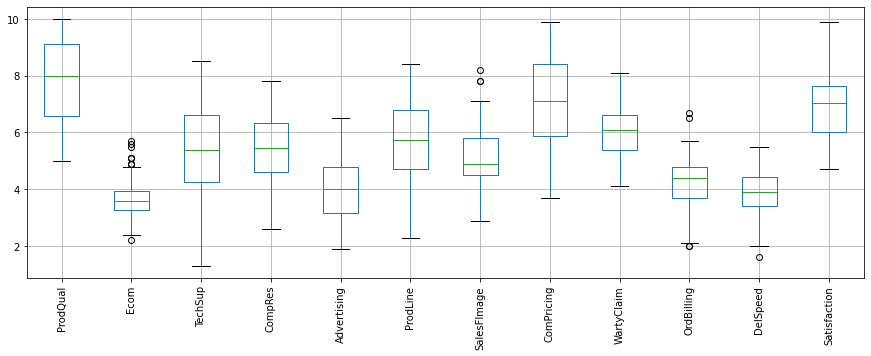

In [ ]:
#Identify Outliers for an unscaled data using Boxplot
df.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

In [18]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature and also remove it
def remove_outlier(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3-Q1
  LL = Q1 - (1.5*IQR)
  UL = Q3 + (1.5*IQR)
  return LL, UL

col = list(df.columns)
for i in col:
  ll, up = remove_outlier(df[i])
  df[i] = np.where(df[i] > up, up, df[i])
  df[i] = np.where(df[i] < ll, ll, df[i])

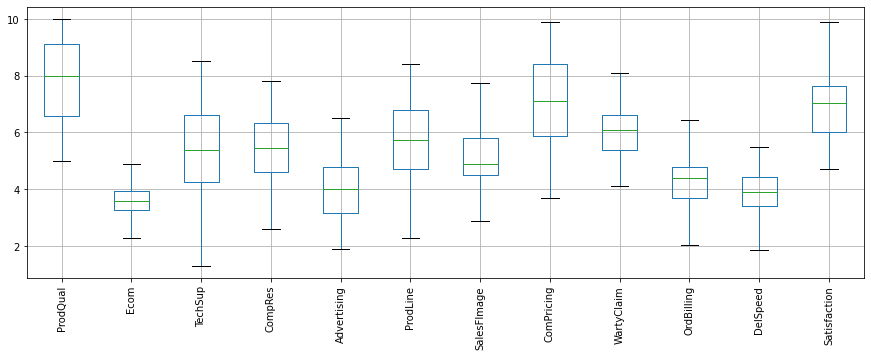

In [19]:
#Boxplot after removing outlier of unscaled data
df.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

### Min-Max Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
col = list(df1.columns)
for i in col:
  df1[i] = minmax_scale.fit_transform(df1[[i]])

In [21]:
df1.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.562000,0.517692,0.564583,0.546538,0.458696,0.574590,0.457216,0.528065,0.485750,0.505909,0.557010,0.426538
std,0.279256,0.244442,0.212563,0.232385,0.244988,0.215620,0.218065,0.249202,0.204935,0.208840,0.199756,0.229200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.315000,0.375000,0.409722,0.384615,0.277174,0.393443,0.329897,0.350806,0.325000,0.375000,0.422680,0.250000
50%,0.600000,0.500000,0.569444,0.548077,0.456522,0.565574,0.412371,0.548387,0.500000,0.534091,0.560137,0.451923
75%,0.820000,0.625000,0.739583,0.716346,0.630435,0.737705,0.597938,0.758065,0.625000,0.625000,0.704467,0.562500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Z Scale transformation

In [38]:
from scipy.stats import zscore
df_zscaled=df2.apply(zscore)
df_zscaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.496660,0.401668,-1.881421,0.380922,0.704543,-0.691530,0.838627,-0.113185,-1.646582,0.791872,-0.260903,1.081067
1,0.280721,-1.495974,-0.174023,1.462141,-0.544014,1.600835,-1.917200,-1.088915,-0.665744,-0.411249,1.398918,-1.027098
2,1.000518,-0.389017,0.154322,0.131410,1.239639,1.218774,0.648570,-1.609304,0.192489,1.229371,0.845644,1.671354
3,-1.014914,-0.547153,1.073690,-1.448834,0.615361,-0.844354,-0.586801,1.187789,1.173327,0.026250,-1.229132,-1.786038
4,0.856559,-0.389017,-0.108354,-0.700298,-1.614207,0.149004,-0.586801,-0.113185,0.069885,0.244999,-0.537540,0.153474


In [39]:
df_zscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProdQual      100 non-null    float64
 1   Ecom          100 non-null    float64
 2   TechSup       100 non-null    float64
 3   CompRes       100 non-null    float64
 4   Advertising   100 non-null    float64
 5   ProdLine      100 non-null    float64
 6   SalesFImage   100 non-null    float64
 7   ComPricing    100 non-null    float64
 8   WartyClaim    100 non-null    float64
 9   OrdBilling    100 non-null    float64
 10  DelSpeed      100 non-null    float64
 11  Satisfaction  100 non-null    float64
dtypes: float64(12)
memory usage: 9.5 KB


### Check if data available is ok for further PCA check

Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

HO : All variables in the data are uncorrelated

HA : At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_zscaled)
p_value

1.5215228697591253e-120

KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

>Generally, if MSA is less than *0.5*, PCA is not recommended, since no reduction is expected. On the other hand, *MSA > 0.7* is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_zscaled)
kmo_model

0.6615156803188277

##3 PCA: Comment on the comparison between covariance and the correlation matrix after scaling.

Covariance measures how two variables are related to each other and whether they increase or decrease together. However, the magnitude of covariance is influenced by the scale of the variables. This means that variables with larger scales will have a greater influence on the covariance value than variables with smaller scales. Therefore, it can be difficult to compare covariances across variables that have different scales.

On the other hand, correlation measures the linear relationship between two variables and is scaled to fall between -1 and 1. By scaling the values, correlation coefficients can be compared directly, making it easier to understand the strength and direction of relationships between variables. This is particularly important when comparing variables with different scales, as correlation is not influenced by the scale of the variables.

While covariance is a measure of the extent to which two variables change together, correlation measures the strength and direction of the linear relationship between two variables.

In [ ]:
cov_matrix = np.cov(df_zscaled.T)
print('Covariance Matrix \n ', cov_matrix)

Covariance Matrix 
  [[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02  4.91237372e-01]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01  2.85601025e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02  1.13734524e-01]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01  6.09356166e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01  

In [ ]:
df_zscaled.corr()


,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


##4 PCA: Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [32]:
df4.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


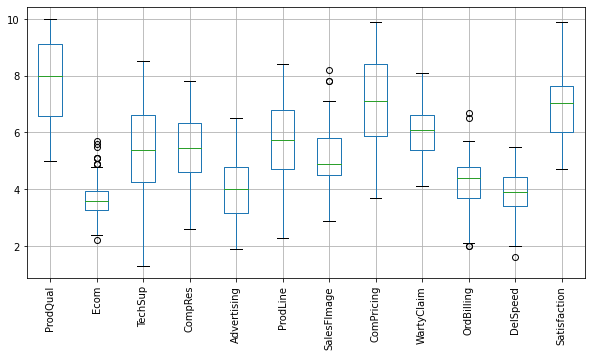

<Figure size 432x288 with 0 Axes>

In [33]:
#Boxplot Representation
df4.boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [34]:
#Z score scaling
from scipy.stats import zscore
df_z_with_outlier=df4.apply(zscore)
df_z_with_outlier.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474


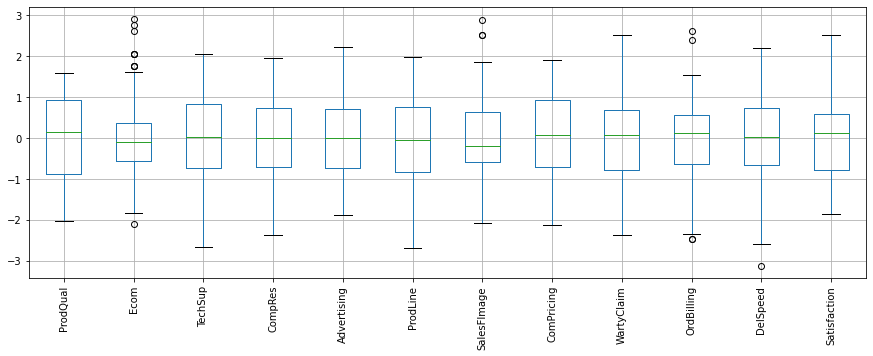

In [35]:
#Outlier after scaling 
df_z_with_outlier.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

In [36]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature and also remove it
def remove_outlier(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3-Q1
  LL = Q1 - (1.5*IQR)
  UL = Q3 + (1.5*IQR)
  return LL, UL

col = list(df4.columns)
for i in col:
  ll, up = remove_outlier(df[i])
  df4[i] = np.where(df4[i] > up, up, df4[i])
  df4[i] = np.where(df4[i] < ll, ll, df4[i])

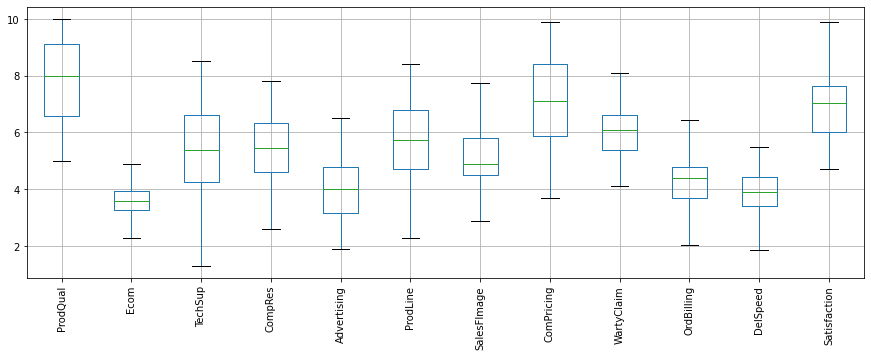

In [37]:
#Boxplot after removing outlier of scaled data
df4.boxplot(figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

##5 PCA: Build the covariance matrix, eigenvalues and eigenvector.

In [40]:
df_zscaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.496660,0.401668,-1.881421,0.380922,0.704543,-0.691530,0.838627,-0.113185,-1.646582,0.791872,-0.260903,1.081067
1,0.280721,-1.495974,-0.174023,1.462141,-0.544014,1.600835,-1.917200,-1.088915,-0.665744,-0.411249,1.398918,-1.027098
2,1.000518,-0.389017,0.154322,0.131410,1.239639,1.218774,0.648570,-1.609304,0.192489,1.229371,0.845644,1.671354
3,-1.014914,-0.547153,1.073690,-1.448834,0.615361,-0.844354,-0.586801,1.187789,1.173327,0.026250,-1.229132,-1.786038
4,0.856559,-0.389017,-0.108354,-0.700298,-1.614207,0.149004,-0.586801,-0.113185,0.069885,0.244999,-0.537540,0.153474


###Create covariance matrix

In [41]:
#Create covariance matrix
from sklearn.decomposition import PCA 
pca = PCA(random_state=123)
cov_matrix = pca.fit_transform(df_zscaled)

In [42]:
#Display in tabular format
pd.DataFrame(np.round(pca.get_covariance(),2),columns=df_zscaled.columns,index=df_zscaled.columns)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.01,-0.16,0.10,0.11,-0.05,0.48,-0.15,-0.41,0.09,0.10,0.02,0.49
Ecom,-0.16,1.01,-0.02,0.11,0.43,-0.10,0.79,0.27,0.03,0.15,0.17,0.24
TechSup,0.10,-0.02,1.01,0.10,-0.06,0.19,0.01,-0.27,0.81,0.09,0.03,0.11
CompRes,0.11,0.11,0.10,1.01,0.20,0.57,0.23,-0.13,0.14,0.77,0.88,0.61
Advertising,-0.05,0.43,-0.06,0.20,1.01,-0.01,0.55,0.14,0.01,0.19,0.28,0.31
ProdLine,0.48,-0.10,0.19,0.57,-0.01,1.01,-0.06,-0.50,0.28,0.43,0.61,0.56
SalesFImage,-0.15,0.79,0.01,0.23,0.55,-0.06,1.01,0.27,0.10,0.20,0.27,0.51
ComPricing,-0.41,0.27,-0.27,-0.13,0.14,-0.50,0.27,1.01,-0.25,-0.11,-0.07,-0.21
WartyClaim,0.09,0.03,0.81,0.14,0.01,0.28,0.10,-0.25,1.01,0.20,0.12,0.18
OrdBilling,0.10,0.15,0.09,0.77,0.19,0.43,0.20,-0.11,0.20,1.01,0.76,0.53


### Eigen values and eigen vector

In [43]:
eigen_Values=pca.explained_variance_
print('Eigen Values: \n',np.round(eigen_Values,4))
print('\n')
Eigen_Vectors=pca.components_
print('Eigen Vectors:\n',np.round(Eigen_Vectors,4))

Eigen Values: 
 [4.0604 2.6156 1.6962 1.2299 0.6447 0.5631 0.4064 0.3394 0.2373 0.146
 0.0982 0.0842]


Eigen Vectors:
 [[-1.613e-01 -1.390e-01 -1.271e-01 -4.255e-01 -1.773e-01 -3.565e-01
  -2.104e-01  1.376e-01 -1.767e-01 -3.912e-01 -4.250e-01 -4.133e-01]
 [-3.063e-01  4.549e-01 -2.353e-01  8.900e-03  3.559e-01 -2.899e-01
   4.649e-01  4.155e-01 -1.978e-01  2.060e-02  6.260e-02  2.960e-02]
 [ 7.950e-02 -2.299e-01 -6.217e-01  1.918e-01 -9.220e-02  1.128e-01
  -2.366e-01  4.500e-02 -6.114e-01  1.428e-01  2.077e-01  3.040e-02]
 [ 6.165e-01  1.838e-01 -1.665e-01 -2.799e-01  2.147e-01  9.850e-02
   2.130e-01 -2.369e-01 -1.755e-01 -3.034e-01 -2.939e-01  3.370e-01]
 [-2.567e-01 -1.960e-01 -4.320e-02 -3.100e-02  7.633e-01  1.960e-02
  -1.387e-01 -4.843e-01 -2.290e-02 -4.970e-02  5.540e-02 -2.237e-01]
 [ 3.497e-01 -4.721e-01  1.190e-01  2.270e-02  4.105e-01 -1.943e-01
  -1.703e-01  6.007e-01  1.370e-01  7.620e-02 -2.670e-02  1.372e-01]
 [ 1.596e-01  4.580e-02 -1.900e-03 -5.700e-03 -5.500e-02 -

##6 PCA: Write the explicit form of the first PC (in terms of Eigen Vectors).# 

In [44]:
df_zscaled.columns

Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed',
       'Satisfaction'],
      dtype='object')

In [45]:
pca.explained_variance_

array([4.06041575, 2.61555054, 1.69615738, 1.22994533, 0.64467056,
       0.56308559, 0.40636329, 0.33938181, 0.2372518 , 0.14600259,
       0.09819793, 0.08418956])

In [46]:
pca.components_

array([[-1.61322427e-01, -1.38992261e-01, -1.27131534e-01,
        -4.25502348e-01, -1.77257763e-01, -3.56524003e-01,
        -2.10387616e-01,  1.37603805e-01, -1.76706227e-01,
        -3.91237634e-01, -4.24958585e-01, -4.13318690e-01],
       [-3.06272359e-01,  4.54921339e-01, -2.35263231e-01,
         8.86065191e-03,  3.55907323e-01, -2.89852601e-01,
         4.64926872e-01,  4.15466718e-01, -1.97843283e-01,
         2.05739475e-02,  6.26377391e-02,  2.95573690e-02],
       [ 7.95045575e-02, -2.29883744e-01, -6.21730460e-01,
         1.91750596e-01, -9.22380787e-02,  1.12809185e-01,
        -2.36626212e-01,  4.49919990e-02, -6.11385841e-01,
         1.42820217e-01,  2.07727869e-01,  3.04020598e-02],
       [ 6.16476615e-01,  1.83792626e-01, -1.66476236e-01,
        -2.79905722e-01,  2.14732458e-01,  9.85304039e-02,
         2.12995164e-01, -2.36864713e-01, -1.75501531e-01,
        -3.03399090e-01, -2.93932094e-01,  3.37012361e-01],
       [-2.56708792e-01, -1.95989018e-01, -4.3201832

In [47]:
print('The Linear eq of 1st component: ')
for i in range(0,df_zscaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),df_zscaled.columns[i]),end=' + ')

The Linear eq of 1st component: 
-0.161 * ProdQual + -0.139 * Ecom + -0.127 * TechSup + -0.426 * CompRes + -0.177 * Advertising + -0.357 * ProdLine + -0.21 * SalesFImage + 0.138 * ComPricing + -0.177 * WartyClaim + -0.391 * OrdBilling + -0.425 * DelSpeed + -0.413 * Satisfaction + 

##7 PCA: Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame

In [48]:
pca.explained_variance_ratio_

array([0.3349843 , 0.21578292, 0.13993298, 0.10147049, 0.05318532,
       0.04645456, 0.03352497, 0.027999  , 0.01957327, 0.01204521,
       0.00810133, 0.00694564])

In [49]:
#Cumulative value of Eigen Value
np.cumsum(pca.explained_variance_ratio_)

array([0.3349843 , 0.55076722, 0.6907002 , 0.79217069, 0.84535601,
       0.89181057, 0.92533555, 0.95333455, 0.97290782, 0.98495303,
       0.99305436, 1.        ])

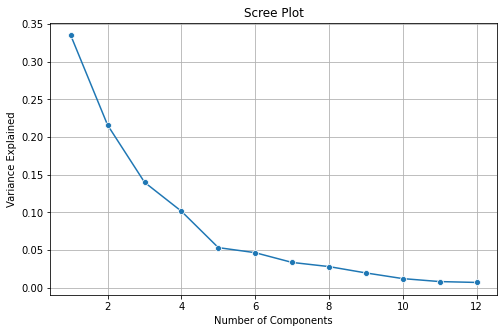

In [50]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [54]:
pca = PCA(n_components=5)
X_pca= pca.fit_transform(df_zscaled)

In [55]:
pca.components_

array([[-0.16132243, -0.13899226, -0.12713153, -0.42550235, -0.17725776,
        -0.356524  , -0.21038762,  0.1376038 , -0.17670623, -0.39123763,
        -0.42495858, -0.41331869],
       [-0.30627236,  0.45492134, -0.23526323,  0.00886065,  0.35590732,
        -0.2898526 ,  0.46492687,  0.41546672, -0.19784328,  0.02057395,
         0.06263774,  0.02955737],
       [ 0.07950456, -0.22988374, -0.62173046,  0.1917506 , -0.09223808,
         0.11280918, -0.23662621,  0.044992  , -0.61138584,  0.14282022,
         0.20772787,  0.03040206],
       [ 0.61647662,  0.18379263, -0.16647624, -0.27990572,  0.21473246,
         0.0985304 ,  0.21299516, -0.23686471, -0.17550153, -0.30339909,
        -0.29393209,  0.33701236],
       [-0.25670879, -0.19598902, -0.04320183, -0.03100146,  0.76327386,
         0.0196214 , -0.13867996, -0.48428924, -0.02288773, -0.04966976,
         0.05538837, -0.22374634]])

In [53]:
df_PCA = pd.DataFrame(pca.components_,columns=list(df_zscaled))
df_PCA

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-0.161322,-0.138992,-0.127132,-0.425502,-0.177258,-0.356524,-0.210388,0.137604,-0.176706,-0.391238,-0.424959,-0.413319
1,-0.306272,0.454921,-0.235263,0.008861,0.355907,-0.289853,0.464927,0.415467,-0.197843,0.020574,0.062638,0.029557
2,0.079505,-0.229884,-0.621730,0.191751,-0.092238,0.112809,-0.236626,0.044992,-0.611386,0.142820,0.207728,0.030402
3,0.616477,0.183793,-0.166476,-0.279906,0.214732,0.098530,0.212995,-0.236865,-0.175502,-0.303399,-0.293932,0.337012
4,-0.256709,-0.195989,-0.043202,-0.031001,0.763274,0.019621,-0.138680,-0.484289,-0.022888,-0.049670,0.055388,-0.223746


##8 PCA: Mention the business implication of using the Principal Component Analysis for this case study.

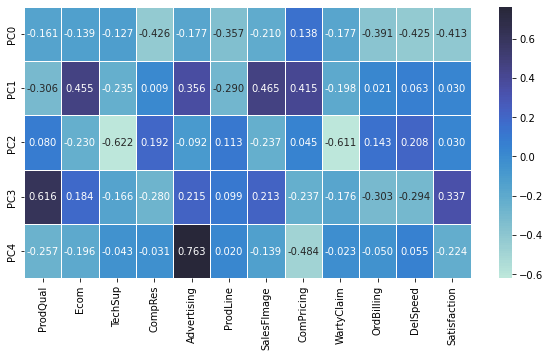

In [56]:
plt.figure(figsize= (10,5))
sns.heatmap(df_PCA, annot=True, linewidths=.5, fmt= '.3f', center = 1, yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4'])
plt.show()

Conclusion
Based on the above analysis, I observed that maximum data can be captured within 5 PCs.

Each PC varies from each other based on the information they convey.

For instance in PC0 compres (Complaint resolution), Prodline(Product line) and ordbilling(order and billing) contributes the most. So taking care of these parameters will lead to maximum customer satisfaction.

Similar for PC1, Ecom(e-commerce), salesfimage(Salesforce image) and comprising plays an important role in customer satisfaction.

For PC2 advertisement plays the most important role in customer satisfaction
For PC3 Product quantity plays the most important role in customer satisfaction
For PC3 advertisement  plays the most important role in customer satisfaction

So by properly monitoring the following features the customer satisfaction can be increased.

Another advantage is it helped to reduce multicollinearity and helped to reduce dimensions while maintaining maximum variation as possible.
